In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
salary=pd.read_csv('salaries_data.csv')
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


Lo primero...estudiar un poco el dataframe, ver si tiene nulos o no, cuantas columnas categoricas hay, etc...

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary              500 non-null    int64 
 5   salary_currency     500 non-null    object
 6   salary_in_usd       500 non-null    int64 
 7   employee_residence  500 non-null    object
 8   remote_ratio        500 non-null    int64 
 9   company_location    500 non-null    object
 10  company_size        500 non-null    object
dtypes: int64(4), object(7)
memory usage: 43.1+ KB


In [4]:
salary.work_year.unique()

array([2022, 2021, 2020], dtype=int64)

In [5]:
salary.experience_level.unique() #senior, midium-level, entry-level,executive

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [6]:
salary.employment_type.unique()# Full time, flexible, part time, contract??? ni idea

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [7]:
salary.job_title.unique()  #demasiados...

array(['Data Engineer', 'BI Data Analyst', 'ML Engineer',
       'Machine Learning Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Principal Data Scientist',
       'Data Engineering Manager', 'Data Analytics Manager',
       'Big Data Engineer', 'Research Scientist',
       'Machine Learning Developer', 'Computer Vision Engineer',
       'AI Scientist', 'Machine Learning Manager', 'Lead Data Scientist',
       'Director of Data Science', '3D Computer Vision Researcher',
       'Data Specialist', 'Applied Data Scientist',
       'Data Science Engineer', 'Head of Data', 'Analytics Engineer',
       'ETL Developer', 'Marketing Data Analyst', 'Data Architect',
       'Data Science Consultant', 'Principal Data Analyst',
       'Head of Data Science', 'Lead Data Engineer',
       'Data Science Manager', 'Applied Machine Learning Scientist',
       'Lead Data Analyst', 'Cloud Data Engineer',
       'Lead Machine Learning Engineer',
       'Machine Learning 

In [8]:
salary.salary.unique()#esta creo que me la voy a fumar

array([  140250,   135000,   100000,   270000,    22000,   153000,
          45000,    42000,    70000,    50000,    55000,   110500,
         136994,    21000,   130000,   175000,    51999,   112000,
        2250000,   109280,    85000,    12000,   154000,   160000,
          18000,  8500000,   132320,    69000,    60000,   112900,
          10000,    48000,   150075,    61300,  1335000,    80000,
         140000,   157000,    65000,    90320,   115000,    20000,
          75000,   215300,    81666,    58000,    99100,   165400,
         115934,   120000,     4000,   112300,     9272,   400000,
         412000,   165000,   206699,    68000,   190000,    90000,
         159500,   256000,    87000,    73000,    65720,   150000,
          30000,   138000,   183600,   109000,    54000, 30400000,
         110000,   181940,    52800,  3000000,   126000,    40000,
         200000,   136600,   120600,   266400,   155000,    76760,
         108000,   176000,   250000,   170000,   138600,    99

In [9]:
salary.salary_currency.unique() # y esta tambien

array(['USD', 'EUR', 'INR', 'GBP', 'JPY', 'CAD', 'MXN', 'CHF', 'CLP',
       'TRY', 'AUD', 'BRL', 'HUF', 'PLN', 'SGD'], dtype=object)

In [10]:
salary.salary_in_usd.unique() # esta es mi y

array([140250, 135000, 100000, 270000,  26005, 153000,  51321,  49646,
        76940,  59102,  62726, 110500, 136994,  24823, 148261, 175000,
        59303, 112000,  30428, 109280, 109024,  12000, 154000, 160000,
        18000,  77364, 132320, 130000,  69000,  78526,  82528, 112900,
        78791,  10000,  56738, 150075,  61300,  18053, 104702, 140000,
       117104,  71444,  90320, 115000,  20000,  98158, 215300,  81666,
         2859,  99100, 165400, 115934, 120000, 141846,   4000,  82744,
       112300,   9272,   5409, 412000, 165000, 206699,  94564,  65438,
        54238,  55000, 122346, 190000,  90000, 127221, 256000,  76833,
       102839,  73000,  77684, 150000,  32974, 138000, 183600, 109000,
        63831,  40038,  54957, 110000, 181940,  58035,  40481, 126000,
        47282,  88654, 200000, 136600,  80000, 120600, 266400, 155000,
        90734,  39263,  12103, 176000,  28016, 170000, 138600,  99050,
       125000, 144854, 152500,  38400,  99360, 180000, 153667, 147000,
      

In [11]:
salary.employee_residence.unique()##esta creo que me la voy a cargar

array(['US', 'RO', 'FR', 'GR', 'SI', 'DE', 'IN', 'GB', 'PK', 'MD', 'JP',
       'CA', 'PT', 'IE', 'AE', 'IT', 'MX', 'VN', 'BE', 'KE', 'ES', 'CH',
       'CL', 'JE', 'TR', 'NZ', 'UA', 'AU', 'NG', 'BG', 'HK', 'EE', 'CZ',
       'RU', 'PR', 'AT', 'BR', 'DZ', 'IR', 'NL', 'RS', 'HU', 'PL', 'HN',
       'MY', 'BO', 'MT', 'LU', 'SG'], dtype=object)

In [12]:
salary.remote_ratio.unique()

array([100,   0,  50], dtype=int64)

In [13]:
salary.company_location.unique()# no se que hacer con esto

array(['US', 'FR', 'GR', 'LU', 'SI', 'DE', 'IN', 'GB', 'PK', 'MD', 'JP',
       'CA', 'AS', 'IE', 'AE', 'MX', 'VN', 'BE', 'KE', 'ES', 'CH', 'CL',
       'CN', 'DK', 'TR', 'NZ', 'PL', 'UA', 'AU', 'NG', 'EE', 'CZ', 'AT',
       'BR', 'DZ', 'IR', 'NL', 'HU', 'PT', 'HN', 'MT', 'RO', 'SG'],
      dtype=object)

In [14]:
salary.company_size.unique() # large, medium , small

array(['M', 'L', 'S'], dtype=object)

Voy a separar mi dataframe y generar mi X y mi Y

In [15]:
X=salary.drop(['salary_in_usd'], axis=1)
X.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,RO,0,US,L


In [16]:
Y=salary.salary_in_usd
Y.head()

0    140250
1    135000
2    100000
3    270000
4     26005
Name: salary_in_usd, dtype: int64

In [17]:
X=X.drop(['salary_currency', 'salary','employee_residence'], axis=1)
X

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,100,US,M
1,2022,SE,FT,Data Engineer,100,US,M
2,2021,MI,FT,BI Data Analyst,100,US,M
3,2021,MI,CT,ML Engineer,100,US,L
4,2021,MI,FT,Data Engineer,0,US,L
...,...,...,...,...,...,...,...
495,2022,SE,FT,Data Engineer,100,US,M
496,2021,EN,FT,Big Data Engineer,0,CH,L
497,2022,SE,FT,Data Architect,100,CA,M
498,2021,MI,FT,Data Engineer,100,GB,L


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         500 non-null    int64 
 1   experience_level  500 non-null    object
 2   employment_type   500 non-null    object
 3   job_title         500 non-null    object
 4   remote_ratio      500 non-null    int64 
 5   company_location  500 non-null    object
 6   company_size      500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


Vale...tengo ya las dos creadas, ahora voy a ver que hago con las categóricas....hay alguna que tiene demasiados valores únicos, creo que los voy a reducir.


In [19]:
salary.job_title.value_counts().head()

Data Scientist               121
Data Engineer                111
Data Analyst                  81
Machine Learning Engineer     31
Research Scientist            12
Name: job_title, dtype: int64

In [20]:
def jobs(x):
    if 'Scien' in x:
        return 'Data Scientist'
    elif 'Machine Learning Engineer' in x or  'Machine Learning' in x:
        return 'Machine Learning '
    elif 'Engineer' in x or 'Architect' in x:
        return 'Data Engineer'   
    elif 'Data'in x or 'Analys' in x or 'ETL' in x:
        return 'Data Analyst'
        
        
       

In [21]:
X.job_title=salary.job_title.apply(jobs)

In [22]:
X.job_title.value_counts()

Data Scientist       191
Data Engineer        158
Data Analyst         112
Machine Learning      38
Name: job_title, dtype: int64

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         500 non-null    int64 
 1   experience_level  500 non-null    object
 2   employment_type   500 non-null    object
 3   job_title         499 non-null    object
 4   remote_ratio      500 non-null    int64 
 5   company_location  500 non-null    object
 6   company_size      500 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.5+ KB


In [24]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: salary_in_usd
Non-Null Count  Dtype
--------------  -----
500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


Ahora voy a transformar las columnas de categoricas a numéricas

In [25]:
X.experience_level=LabelEncoder().fit_transform(X.experience_level)

X.head() #3 senior, 2 medium 1?? 0???

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2022,3,FT,Data Engineer,100,US,M
1,2022,3,FT,Data Engineer,100,US,M
2,2021,2,FT,Data Analyst,100,US,M
3,2021,2,CT,Data Engineer,100,US,L
4,2021,2,FT,Data Engineer,0,US,L


In [26]:
X.employment_type.value_counts()

FT    484
PT      8
CT      4
FL      4
Name: employment_type, dtype: int64

In [27]:
X.employment_type=LabelEncoder().fit_transform(X.employment_type)

X.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2022,3,2,Data Engineer,100,US,M
1,2022,3,2,Data Engineer,100,US,M
2,2021,2,2,Data Analyst,100,US,M
3,2021,2,0,Data Engineer,100,US,L
4,2021,2,2,Data Engineer,0,US,L


In [28]:
X.employment_type.value_counts() #CT 0, FL 1, PT 3 y FT 2

2    484
3      8
0      4
1      4
Name: employment_type, dtype: int64

In [29]:
X.job_title.value_counts()

Data Scientist       191
Data Engineer        158
Data Analyst         112
Machine Learning      38
Name: job_title, dtype: int64

In [30]:
X.job_title=LabelEncoder().fit_transform(X.job_title)

X.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2022,3,2,1,100,US,M
1,2022,3,2,1,100,US,M
2,2021,2,2,0,100,US,M
3,2021,2,0,1,100,US,L
4,2021,2,2,1,0,US,L


In [31]:
X.job_title.value_counts()# 2 Data Scien, 1 Data engineer, 0 Data analyst, 3 Machine

2    191
1    158
0    112
3     38
4      1
Name: job_title, dtype: int64

In [32]:
X.company_size.value_counts()

M    273
L    165
S     62
Name: company_size, dtype: int64

In [33]:
X.company_size=LabelEncoder().fit_transform(X.company_size)

X.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2022,3,2,1,100,US,1
1,2022,3,2,1,100,US,1
2,2021,2,2,0,100,US,1
3,2021,2,0,1,100,US,0
4,2021,2,2,1,0,US,0


In [34]:
X.company_size.value_counts() #1 M, 0 L, 2S

1    273
0    165
2     62
Name: company_size, dtype: int64

In [35]:
X.company_location.value_counts()

US    296
GB     41
CA     25
DE     23
IN     19
FR     12
ES     12
GR     10
JP      4
NL      4
PT      4
LU      3
AE      3
AT      3
PL      3
PK      3
TR      3
CH      2
AU      2
BR      2
NG      2
SI      2
BE      2
MT      1
IR      1
DZ      1
HU      1
CZ      1
HN      1
RO      1
CL      1
EE      1
UA      1
NZ      1
DK      1
CN      1
KE      1
VN      1
MX      1
IE      1
AS      1
MD      1
SG      1
Name: company_location, dtype: int64

In [36]:
def paises2(x):
    if 'US' in x:
        return 'US'
    elif 'GB' in x:
        return 'GB'
    elif 'CA' in x:
        return 'CA'
    elif 'DE' in x:
        return 'DE'
    elif 'IN' in x:
        return 'IN'
    elif 'FR' in x:
        return 'FR'
    elif 'ES' in x:
        return 'ES'
    elif 'GR' in x:
        return 'GR'
    else:
        return 'OTHERS'
    

In [37]:
X.company_location=X.company_location.apply(paises2)


In [38]:
X.company_location.value_counts()

US        296
OTHERS     62
GB         41
CA         25
DE         23
IN         19
FR         12
ES         12
GR         10
Name: company_location, dtype: int64

In [39]:
X.company_location=LabelEncoder().fit_transform(X.company_location)

X.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2022,3,2,1,100,8,1
1,2022,3,2,1,100,8,1
2,2021,2,2,0,100,8,1
3,2021,2,0,1,100,8,0
4,2021,2,2,1,0,8,0


In [40]:
X.company_location.value_counts()

8    296
7     62
4     41
0     25
1     23
6     19
3     12
2     12
5     10
Name: company_location, dtype: int64

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   work_year         500 non-null    int64
 1   experience_level  500 non-null    int32
 2   employment_type   500 non-null    int32
 3   job_title         500 non-null    int32
 4   remote_ratio      500 non-null    int64
 5   company_location  500 non-null    int32
 6   company_size      500 non-null    int32
dtypes: int32(5), int64(2)
memory usage: 17.7 KB


Ya tengo todo pasado a numérico, creo que no voy a normalizar...

# Empiezo con las regresiones....

In [42]:
%pip install xgboost

%pip install catboost

%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR

from catboost import CatBoostRegressor as CTR

from lightgbm import LGBMRegressor as LGBMR


gbr=GBR()
xgbr=XGBR()
ctr=CTR()
lgbmr=LGBMR()

In [44]:
from sklearn.model_selection import train_test_split as tts      


X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [45]:
gbr.fit(X_train, Y_train) # entrenamos el modelo

GradientBoostingRegressor()

In [46]:
y_pred=gbr.predict(X_test)
y_pred# obtenemos la predic.

array([144244.37636425, 161390.82871027, 158165.01197148,  56304.73455487,
       149460.09925646, 155909.28553347, 143509.54767439,  72143.39301247,
        47518.04628615,  50100.35074661, 124333.44073513, 110124.84455388,
        94514.54271663,  71183.22802923, 124333.44073513,  73491.58286301,
       111526.9814109 ,  45702.59315957, 114506.68046869,  89013.89415984,
       158165.01197148,  78462.92907997,  77747.96130537,  60553.9013295 ,
        47111.14318723, 149460.09925646,  97428.77757448, 196428.66215853,
       124333.44073513, 124333.44073513, 113188.19137885, 124333.44073513,
       114192.49282986, 165197.55086217, 114506.68046869,  59132.74327256,
       191920.52262104,  80634.72529971, 149460.09925646, 167412.03165855,
       100002.56940716, 144244.37636425, 162498.72379695, 154151.41505358,
       149460.09925646, 109092.11492449, 158165.01197148,  65435.30648512,
        11777.3968668 ,  80834.67049433, 124333.44073513,  53077.63871163,
       106490.53433646, 1

In [47]:
from sklearn.metrics import mean_squared_error as mse

In [48]:
y_pred=gbr.predict(X_test)

mse(Y_test, y_pred, squared=False)

39486.936573987245

# voy a modificar el testeo...

In [49]:
testeo=pd.read_csv('testeo.csv')
testeo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [50]:
testeo=testeo.drop(['salary_currency', 'salary','employee_residence'], axis=1)
testeo

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,0,JP,S
1,2020,MI,FT,Lead Data Analyst,100,US,L
2,2020,MI,FT,Data Analyst,100,US,L
3,2020,MI,FT,Machine Learning Engineer,0,CN,M
4,2020,MI,FT,Product Data Analyst,100,IN,L
...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,100,US,M
103,2022,SE,FT,Data Architect,100,US,M
104,2022,SE,FT,Data Scientist,100,US,M
105,2022,EN,FT,Data Analyst,0,CA,M


In [51]:
def jobs2(x):
    if 'Scien' in x:
        return 'Data Scientist'
    elif 'Machine Learning Engineer' in x or  'Machine Learning' in x:
        return 'Machine Learning '
    elif 'Engineer' in x or 'Architect' in x:
        return 'Data Engineer'   
    elif 'Data'in x or 'Analys' in x or 'ETL' in x:
        return 'Data Analyst'
        

In [52]:
testeo.job_title=testeo.job_title.apply(jobs2)
testeo

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2020,SE,FT,Data Scientist,0,JP,S
1,2020,MI,FT,Data Analyst,100,US,L
2,2020,MI,FT,Data Analyst,100,US,L
3,2020,MI,FT,Machine Learning,0,CN,M
4,2020,MI,FT,Data Analyst,100,IN,L
...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,100,US,M
103,2022,SE,FT,Data Engineer,100,US,M
104,2022,SE,FT,Data Scientist,100,US,M
105,2022,EN,FT,Data Analyst,0,CA,M


In [53]:
testeo.experience_level=LabelEncoder().fit_transform(testeo.experience_level)

testeo.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2020,3,FT,Data Scientist,0,JP,S
1,2020,2,FT,Data Analyst,100,US,L
2,2020,2,FT,Data Analyst,100,US,L
3,2020,2,FT,Machine Learning,0,CN,M
4,2020,2,FT,Data Analyst,100,IN,L


In [54]:
testeo.employment_type=LabelEncoder().fit_transform(testeo.employment_type)

testeo.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2020,3,1,Data Scientist,0,JP,S
1,2020,2,1,Data Analyst,100,US,L
2,2020,2,1,Data Analyst,100,US,L
3,2020,2,1,Machine Learning,0,CN,M
4,2020,2,1,Data Analyst,100,IN,L


In [55]:
testeo.job_title=LabelEncoder().fit_transform(testeo.job_title)

testeo.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2020,3,1,2,0,JP,S
1,2020,2,1,0,100,US,L
2,2020,2,1,0,100,US,L
3,2020,2,1,3,0,CN,M
4,2020,2,1,0,100,IN,L


In [56]:
testeo.company_location=testeo.company_location.apply(paises2)

In [57]:
testeo.company_location=LabelEncoder().fit_transform(testeo.company_location)

testeo.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2020,3,1,2,0,7,S
1,2020,2,1,0,100,8,L
2,2020,2,1,0,100,8,L
3,2020,2,1,3,0,7,M
4,2020,2,1,0,100,6,L


In [58]:
testeo.company_size=LabelEncoder().fit_transform(testeo.company_size)

testeo.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2020,3,1,2,0,7,2
1,2020,2,1,0,100,8,0
2,2020,2,1,0,100,8,0
3,2020,2,1,3,0,7,1
4,2020,2,1,0,100,6,0


In [59]:
y_pred2=gbr.predict(testeo)
y_pred2

array([ 57837.6244426 ,  50577.69858321,  50577.69858321,  36114.71004127,
       -33549.73712063,  23337.3438255 , 174658.96697085, -44168.64390292,
        86477.51310317, 106283.89447406,  58886.3977549 , 162249.0665    ,
        45794.97987396,  44575.32190558,  26695.06525   ,  24553.18442546,
        50643.34255392,  58097.13533926,  58037.65759974,  45746.02699678,
        41715.095248  , -21275.70023514,  30924.78969125,  73032.81293098,
        24143.83285786,  52303.37736291, 103697.04348667,  81115.00807716,
         8568.7276399 ,  61022.89605531, 131989.72721277, 111271.7303279 ,
       123940.72575327,   1054.91120151,  70430.54316436,  15811.24725827,
       109169.53190343, -10033.8954165 ,  69491.55053577,  91054.62347753,
        30835.96634497,  26136.18457066,  66206.56825229, 119713.40261534,
        97228.48173106, 204645.32983078,  57592.86029392,  81583.09136234,
       111271.7303279 ,  48945.78310327, 150759.01104582,   9920.25100834,
        95181.46914021,  

In [60]:
y_pred2=pd.DataFrame(y_pred2, columns=['salary_in_usd'])

In [61]:
y_pred2.to_csv('prueba1.csv', index_label='id')

# Prueba1: me da un error de 40.000 y cuando la lanzo...de 115000...estoy uy lejos



Vale...primera prueba realizada, ahora voy a subir otra con el resto de  pruebas para ver cual es la prueba que menos errores me da...

In [62]:
xgbr.fit(X_train, Y_train)
ctr.fit(X_train, Y_train)
lgbmr.fit(X_train, Y_train)


Learning rate set to 0.035425
0:	learn: 71509.5293112	total: 145ms	remaining: 2m 24s
1:	learn: 70630.6143523	total: 147ms	remaining: 1m 13s
2:	learn: 69952.2942422	total: 149ms	remaining: 49.5s
3:	learn: 69301.1916474	total: 151ms	remaining: 37.6s
4:	learn: 68603.4301092	total: 153ms	remaining: 30.5s
5:	learn: 67980.7670172	total: 157ms	remaining: 26s
6:	learn: 67351.8291666	total: 159ms	remaining: 22.6s
7:	learn: 66685.5987764	total: 163ms	remaining: 20.2s
8:	learn: 66048.1775312	total: 166ms	remaining: 18.2s
9:	learn: 65584.5453066	total: 168ms	remaining: 16.6s
10:	learn: 65012.2532510	total: 170ms	remaining: 15.3s
11:	learn: 64562.6425197	total: 173ms	remaining: 14.2s
12:	learn: 63984.2204942	total: 176ms	remaining: 13.3s
13:	learn: 63548.4135235	total: 179ms	remaining: 12.6s
14:	learn: 62997.5801843	total: 182ms	remaining: 11.9s
15:	learn: 62607.5851796	total: 183ms	remaining: 11.3s
16:	learn: 62156.6440201	total: 185ms	remaining: 10.7s
17:	learn: 61742.8321654	total: 187ms	remaini

231:	learn: 43581.0878158	total: 322ms	remaining: 1.07s
232:	learn: 43575.3285180	total: 323ms	remaining: 1.06s
233:	learn: 43541.5609490	total: 323ms	remaining: 1.06s
234:	learn: 43518.2032730	total: 324ms	remaining: 1.05s
235:	learn: 43496.9341006	total: 325ms	remaining: 1.05s
236:	learn: 43488.8042617	total: 325ms	remaining: 1.05s
237:	learn: 43471.7656565	total: 326ms	remaining: 1.04s
238:	learn: 43432.8808584	total: 326ms	remaining: 1.04s
239:	learn: 43412.9063505	total: 327ms	remaining: 1.03s
240:	learn: 43391.0874646	total: 327ms	remaining: 1.03s
241:	learn: 43349.5625849	total: 328ms	remaining: 1.03s
242:	learn: 43331.6415990	total: 328ms	remaining: 1.02s
243:	learn: 43313.8298392	total: 329ms	remaining: 1.02s
244:	learn: 43306.3926022	total: 329ms	remaining: 1.01s
245:	learn: 43293.7167074	total: 330ms	remaining: 1.01s
246:	learn: 43281.3922124	total: 330ms	remaining: 1.01s
247:	learn: 43265.0280637	total: 331ms	remaining: 1s
248:	learn: 43245.9572866	total: 331ms	remaining: 1

503:	learn: 39068.0307267	total: 471ms	remaining: 463ms
504:	learn: 39051.1374219	total: 471ms	remaining: 462ms
505:	learn: 39033.1139531	total: 472ms	remaining: 461ms
506:	learn: 39029.7048863	total: 473ms	remaining: 460ms
507:	learn: 39005.7171750	total: 473ms	remaining: 458ms
508:	learn: 38994.6392551	total: 474ms	remaining: 457ms
509:	learn: 38986.0060412	total: 475ms	remaining: 456ms
510:	learn: 38979.2749190	total: 475ms	remaining: 455ms
511:	learn: 38967.7368380	total: 476ms	remaining: 454ms
512:	learn: 38957.1262325	total: 477ms	remaining: 453ms
513:	learn: 38946.8102298	total: 478ms	remaining: 452ms
514:	learn: 38930.3991544	total: 478ms	remaining: 450ms
515:	learn: 38912.1365903	total: 479ms	remaining: 449ms
516:	learn: 38886.6626556	total: 480ms	remaining: 448ms
517:	learn: 38877.9471577	total: 481ms	remaining: 447ms
518:	learn: 38873.7433739	total: 481ms	remaining: 446ms
519:	learn: 38868.7092697	total: 482ms	remaining: 445ms
520:	learn: 38859.0976515	total: 482ms	remaining

770:	learn: 36988.4000550	total: 624ms	remaining: 185ms
771:	learn: 36983.5358022	total: 625ms	remaining: 185ms
772:	learn: 36975.2881920	total: 625ms	remaining: 184ms
773:	learn: 36968.1902651	total: 626ms	remaining: 183ms
774:	learn: 36966.8057857	total: 627ms	remaining: 182ms
775:	learn: 36965.6762739	total: 627ms	remaining: 181ms
776:	learn: 36957.6350718	total: 628ms	remaining: 180ms
777:	learn: 36954.3823283	total: 629ms	remaining: 179ms
778:	learn: 36948.9130482	total: 629ms	remaining: 179ms
779:	learn: 36940.6009507	total: 630ms	remaining: 178ms
780:	learn: 36935.2576453	total: 630ms	remaining: 177ms
781:	learn: 36915.7085017	total: 631ms	remaining: 176ms
782:	learn: 36905.7454708	total: 632ms	remaining: 175ms
783:	learn: 36902.2867385	total: 632ms	remaining: 174ms
784:	learn: 36894.0115908	total: 633ms	remaining: 173ms
785:	learn: 36889.5672369	total: 633ms	remaining: 172ms
786:	learn: 36884.1080582	total: 634ms	remaining: 172ms
787:	learn: 36876.1828079	total: 635ms	remaining

LGBMRegressor()

In [63]:
y_predx=xgbr.predict(X_test)
y_predc=ctr.predict(X_test)
y_predl=lgbmr.predict(X_test)

In [64]:
mse(Y_test, y_predx, squared=False)

49624.57009547316

In [65]:
mse(Y_test, y_predc, squared=False)

43100.0709079067

In [66]:
mse(Y_test, y_predl, squared=False)

39632.27948724183

In [67]:
y_pred2x=xgbr.predict(testeo)
y_pred2c=ctr.predict(testeo)
y_pred2l=lgbmr.predict(testeo)

In [68]:
y_pred2x=pd.DataFrame(y_pred2x, columns=['salary_in_usd'])
y_pred2c=pd.DataFrame(y_pred2c, columns=['salary_in_usd'])
y_pred2l=pd.DataFrame(y_pred2l, columns=['salary_in_usd'])

In [69]:
y_pred2x.to_csv('prueba2.csv', index_label='id')
y_pred2c.to_csv('prueba3.csv', index_label='id')
y_pred2l.to_csv('prueba4.csv', index_label='id')

# he mejorado mi error reduciendolo a 77.000....
y ahora que?? me queda probar un OHL y un ramdom forest..pero antesquiero probar otras cositas
voy a normalizar el dataframe original aunque tenga columaas categóricas, voy a observar la colinialidad después una vez
separadas pribare otro modelo, por ejemplo.

In [70]:
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


me vuelvo a cargar las columnas que no me interesan...

In [71]:
X2=salary.drop(['salary_currency', 'salary','employee_residence'], axis=1)
X2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,100,US,M
1,2022,SE,FT,Data Engineer,135000,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,100,US,M
3,2021,MI,CT,ML Engineer,270000,100,US,L
4,2021,MI,FT,Data Engineer,26005,0,US,L


modifico el dataframe, de categoricas a numéricas...igual modifico alguna más

In [72]:
X2.experience_level=LabelEncoder().fit_transform(X2.experience_level)

X2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,3,FT,Data Engineer,140250,100,US,M
1,2022,3,FT,Data Engineer,135000,100,US,M
2,2021,2,FT,BI Data Analyst,100000,100,US,M
3,2021,2,CT,ML Engineer,270000,100,US,L
4,2021,2,FT,Data Engineer,26005,0,US,L


In [73]:
X2.employment_type=LabelEncoder().fit_transform(X2.employment_type)

X2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,3,2,Data Engineer,140250,100,US,M
1,2022,3,2,Data Engineer,135000,100,US,M
2,2021,2,2,BI Data Analyst,100000,100,US,M
3,2021,2,0,ML Engineer,270000,100,US,L
4,2021,2,2,Data Engineer,26005,0,US,L


In [74]:
X2.job_title=salary.job_title.apply(jobs)   
X2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,3,2,Data Engineer,140250,100,US,M
1,2022,3,2,Data Engineer,135000,100,US,M
2,2021,2,2,Data Analyst,100000,100,US,M
3,2021,2,0,Data Engineer,270000,100,US,L
4,2021,2,2,Data Engineer,26005,0,US,L


In [75]:
X2.job_title=LabelEncoder().fit_transform(X2.job_title)

X2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,3,2,1,140250,100,US,M
1,2022,3,2,1,135000,100,US,M
2,2021,2,2,0,100000,100,US,M
3,2021,2,0,1,270000,100,US,L
4,2021,2,2,1,26005,0,US,L


In [76]:
X2.company_size=LabelEncoder().fit_transform(X2.company_size)

X2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,3,2,1,140250,100,US,1
1,2022,3,2,1,135000,100,US,1
2,2021,2,2,0,100000,100,US,1
3,2021,2,0,1,270000,100,US,0
4,2021,2,2,1,26005,0,US,0


In [77]:
X2.company_location.value_counts()

US    296
GB     41
CA     25
DE     23
IN     19
FR     12
ES     12
GR     10
JP      4
NL      4
PT      4
LU      3
AE      3
AT      3
PL      3
PK      3
TR      3
CH      2
AU      2
BR      2
NG      2
SI      2
BE      2
MT      1
IR      1
DZ      1
HU      1
CZ      1
HN      1
RO      1
CL      1
EE      1
UA      1
NZ      1
DK      1
CN      1
KE      1
VN      1
MX      1
IE      1
AS      1
MD      1
SG      1
Name: company_location, dtype: int64

In [78]:
def paises(x):
    if 'US' in x:
        return 'US'
    elif 'GB' in x:
        return 'GB'
    elif 'CA' in x:
        return 'CA'
    elif 'DE' in x:
        return 'DE'
    elif 'IN' in x:
        return 'IN'
    elif 'FR' in x:
        return 'FR'
    elif 'ES' in x:
        return 'ES'
    elif 'GR' in x:
        return 'GR'
    else:
        return 'OTHERS'
    

In [79]:
X2.company_location=salary.company_location.apply(paises)   
X2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,3,2,1,140250,100,US,1
1,2022,3,2,1,135000,100,US,1
2,2021,2,2,0,100000,100,US,1
3,2021,2,0,1,270000,100,US,0
4,2021,2,2,1,26005,0,US,0


In [80]:
X2.company_location.value_counts()

US        296
OTHERS     62
GB         41
CA         25
DE         23
IN         19
FR         12
ES         12
GR         10
Name: company_location, dtype: int64

In [81]:
X2.company_location=LabelEncoder().fit_transform(X2.company_location)

X2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,3,2,1,140250,100,8,1
1,2022,3,2,1,135000,100,8,1
2,2021,2,2,0,100000,100,8,1
3,2021,2,0,1,270000,100,8,0
4,2021,2,2,1,26005,0,8,0


In [82]:
Y2=X2.salary_in_usd
Y2.head()

0    140250
1    135000
2    100000
3    270000
4     26005
Name: salary_in_usd, dtype: int64

In [83]:
X2=X2.drop(['salary_in_usd'], axis=1)
X2.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,2022,3,2,1,100,8,1
1,2022,3,2,1,100,8,1
2,2021,2,2,0,100,8,1
3,2021,2,0,1,100,8,0
4,2021,2,2,1,0,8,0


vale...ahora normalizo

In [84]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X2=pd.DataFrame(StandardScaler().fit_transform(X2),columns=X2._get_numeric_data().columns)
                                    
X2

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,0.857874,0.809398,0.033826,-0.347244,0.697464,0.631700,0.321106
1,0.857874,0.809398,0.033826,-0.347244,0.697464,0.631700,0.321106
2,-0.606075,-0.184948,0.033826,-1.446115,0.697464,0.631700,0.321106
3,-0.606075,-0.184948,-8.422551,-0.347244,0.697464,0.631700,-1.237661
4,-0.606075,-0.184948,0.033826,-0.347244,-1.775814,0.631700,-1.237661
...,...,...,...,...,...,...,...
495,0.857874,0.809398,0.033826,-0.347244,0.697464,0.631700,0.321106
496,-0.606075,-2.173641,0.033826,-0.347244,-1.775814,0.230366,-1.237661
497,0.857874,0.809398,0.033826,-0.347244,0.697464,-2.578971,0.321106
498,-0.606075,-0.184948,0.033826,-0.347244,0.697464,-0.973636,-1.237661


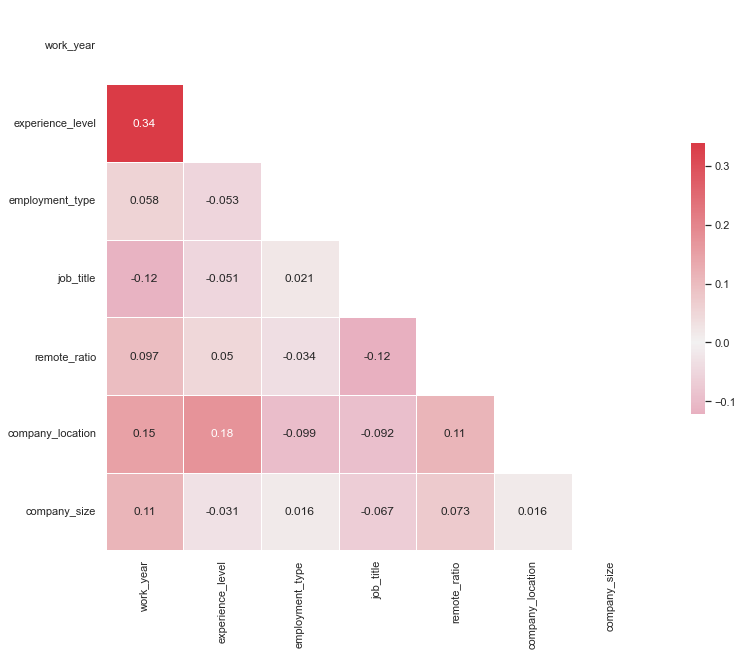

In [85]:
import pylab as plt 
import seaborn as sns
sns.set(style='white') 

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(X2.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(X2.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});


In [86]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [87]:
X2=sm.add_constant(X2)
modelo=sm.OLS(Y2, X2).fit()

In [88]:
y_predY2=modelo.predict(X2)

In [89]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     22.17
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           4.31e-26
Time:                        12:37:09   Log-Likelihood:                -6215.8
No. Observations:                 500   AIC:                         1.245e+04
Df Residuals:                     492   BIC:                         1.248e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.13e+05   2733.627     41.336      0.000    1.08e+05    1.18e+05
work_year         5634.1768   2974.003      1.894      0.059    -209.136    1.15e+04
experience_level  1.582e+04   2946.248      5.370      0.000       1e+04    2.16e+04
employment_type  -7889.7046   2761.858     -2.857      0.004   -1.33e+04   -2463.214
job_title         8798.8421   2779.638      3.165      0.002    3337.416    1.43e+04
remote_ratio      8383.4978   2781.193      3.014      0.003    2919.018    1.38e+04
company_location  1.842e+04   2821.687      6.527      0.000    1.29e+04     2.4e+04
company_size     -1.101e+04   2767.561     -3.977      0.000   -1.64e+04   -5569.823
==============================================================================
Omnibus:                      194.299   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1021.050
Skew:                           1.629   Prob(JB):                    1.91e-222
Kurtosis:                       9.196   Cond. No.                         1.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

esto es una mierda....asi que...tendre que probar otra cosa

voy a volver a probar con lgbmr

In [90]:
X2=X2.drop(['const'], axis=1)
X2

,work_year,experience_level,employment_type,job_title,remote_ratio,company_location,company_size
0,0.857874,0.809398,0.033826,-0.347244,0.697464,0.631700,0.321106
1,0.857874,0.809398,0.033826,-0.347244,0.697464,0.631700,0.321106
2,-0.606075,-0.184948,0.033826,-1.446115,0.697464,0.631700,0.321106
3,-0.606075,-0.184948,-8.422551,-0.347244,0.697464,0.631700,-1.237661
4,-0.606075,-0.184948,0.033826,-0.347244,-1.775814,0.631700,-1.237661
...,...,...,...,...,...,...,...
495,0.857874,0.809398,0.033826,-0.347244,0.697464,0.631700,0.321106
496,-0.606075,-2.173641,0.033826,-0.347244,-1.775814,0.230366,-1.237661
497,0.857874,0.809398,0.033826,-0.347244,0.697464,-2.578971,0.321106
498,-0.606075,-0.184948,0.033826,-0.347244,0.697464,-0.973636,-1.237661


In [91]:
X2_train, X2_test, Y2_train, Y2_test = tts(X2, Y2, train_size=0.8, test_size=0.2, random_state=22)

X2_train.shape, X2_test.shape, Y2_train.shape, Y2_test.shape

((400, 7), (100, 7), (400,), (100,))

In [92]:
y_pred2l=lgbmr.predict(X2_test)

mse(Y2_test, y_pred2l, squared=False)

58204.028405929756

me da peor también...

vuelvo a x modificando la columna y vuelvo a probar

# vuelvo para atras....voy a utilizar x e y inicial 

In [93]:

X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [94]:
y_pred3l=lgbmr.predict(X_test)

mse(Y_test, y_pred3l, squared=False)

39632.27948724183

esto ha hecho que mejore un poquito...se lo aplico al testeo

In [95]:
y_pred3tl=lgbmr.predict(testeo)
y_pred3tl

array([ 71744.08931138, 148805.4441867 , 148805.4441867 ,  76766.56267706,
        53706.93336436,  61987.45582938, 229939.73717133,  50478.76685825,
       119893.44186825, 206701.25935862,  54338.82195427, 192703.67269607,
       123161.9538607 ,  54338.82195427,  75738.35482354,  70578.25504306,
       128588.94588789, 135775.36339738,  43181.69159427, 119490.18338672,
       133982.75564922,  56263.61804531,  75982.77178272, 135457.5858943 ,
        15825.23154665,  54338.82195427, 123409.97310034, 171880.57101212,
        28575.38972836,  75098.46443053,  66356.97828793, 115615.21214936,
        86217.37764494,  51910.63416682,  54338.82195427,  60949.41065843,
       148174.16454628,  23086.19917018,  61037.81668831, 184385.04842264,
        19126.84258277,  23331.53613748, 152085.21738693, 194616.55925333,
       102769.64720036, 183375.05455355, 112712.12517633,  47668.07259421,
       115615.21214936,  43181.69159427, 167584.08048133,  61947.88468875,
       132158.92048811, 1

In [96]:
y_pred3tl=pd.DataFrame(y_pred3tl, columns=['salary_in_usd'])

In [97]:
y_pred3tl.to_csv('prueba5.csv', index_label='id')

# he mejorado bastante....mi error ahora es de 44.000

In [98]:
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR

rfr=RFR()
etr=ETR()

rfr.fit(X_train, Y_train)
etr.fit(X_train, Y_train)

In [99]:

rfr.fit(X_train, Y_train)
etr.fit(X_train, Y_train)

        

ExtraTreeRegressor()

In [100]:
rfr.predict(X_test)[:10]

array([136637.40775891, 185576.        , 158280.57004666,  47719.125     ,
       143048.50729262, 155900.65253968, 158938.6031746 ,  74450.72983333,
        47672.49      ,  53004.03783333])

In [101]:
etr.predict(X_test)[:10]

array([137428.57142857, 189650.        , 159065.1       ,  38776.        ,
       143992.25      , 135000.        , 154833.33333333,  76940.33333333,
        86703.        ,  45807.        ])

In [102]:
y_pred4r=rfr.predict(X_test)

mse(Y_test,y_pred4r, squared=False)

41350.904138163176

In [103]:
y_pred4e=etr.predict(X_test)

mse(Y_test,y_pred4e, squared=False)

55579.15466602731

In [104]:
y_pred4r=rfr.predict(testeo)
y_pred4r

array([ 37725.37083333, 122652.        , 122652.        ,  44177.34      ,
        20875.2       ,  37065.2175    , 276142.83333333,  46554.01      ,
        96814.35366667, 196767.28968254,  35771.425     , 206096.51809524,
        81230.58739583,  39207.235     ,  57248.72866667,  58007.02      ,
       135178.24      , 108994.43767344,  63853.72      ,  71967.442     ,
       134168.31212121,  49140.54      ,  70855.94      , 106036.33764707,
        33366.27      ,  46533.0425    , 106245.76714286, 139968.8747619 ,
        26018.676     ,  64305.6825    ,  74002.94      , 134292.50904651,
        75840.14      ,  48270.5325    ,  47503.41      ,  25999.05433333,
       134147.78095238,  19708.1       ,  63401.58      , 133892.74206349,
        35036.74      ,  28811.7525    , 193641.96969697, 163498.78571429,
       101483.53414286, 175566.25904651,  92631.81716667,  63104.01      ,
       134292.50904651,  59358.91      , 196933.16666667,  41940.00916667,
       108367.55952381, 1

In [105]:
y_pred4r=pd.DataFrame(y_pred4r, columns=['salary_in_usd'])

In [106]:
y_pred4r.to_csv('prueba6.csv', index_label='id')

nada mucho peor...

voy a ir a machaque...pruebo todo y a ver que pasa


In [107]:
from sklearn.linear_model import Ridge, Lasso

from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn.linear_model import ElasticNet

from sklearn.svm import LinearSVR 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import ExtraTreeRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [108]:
models={
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
    'lin': LinearRegression(),
    'elast': ElasticNet(),
    'svr': LinearSVR(),
    'rand': RandomForestRegressor(),
    'tree': DecisionTreeRegressor(),
    
}

In [109]:

for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, Y_train)


ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad
ENTRENANDO:  lin
ENTRENANDO:  elast
ENTRENANDO:  svr
ENTRENANDO:  rand
ENTRENANDO:  tree


C:\Users\Ari\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [110]:

for name, model in models.items():
    y_pred6 = model.predict(X_test)
    print(f"------{name}------")
    print('MSE - Error Cuadratico Medio', mse(Y_test, y_pred6, squared=False))

------ridge------
MSE - Raiz Error Cuadratico Medio 46357.97061261769
------lasso------
MSE - Raiz Error Cuadratico Medio 46376.94256713485
------sgd------
MSE - Raiz Error Cuadratico Medio 2540849594888151.0
------knn------
MSE - Raiz Error Cuadratico Medio 45974.76784514741
------grad------
MSE - Raiz Error Cuadratico Medio 39769.43466658458
------lin------
MSE - Raiz Error Cuadratico Medio 46377.11865909547
------elast------
MSE - Raiz Error Cuadratico Medio 48152.8934867864
------svr------
MSE - Raiz Error Cuadratico Medio 56815.70253350307
------rand------
MSE - Raiz Error Cuadratico Medio 41482.28740448211
------tree------
MSE - Raiz Error Cuadratico Medio 50069.9023379858


In [111]:
gbr.fit(X_train, Y_train)

GradientBoostingRegressor()

In [112]:
gbr.predict(X_test)

array([144244.37636425, 161390.82871027, 158165.01197148,  56304.73455487,
       149460.09925646, 155909.28553347, 143509.54767439,  72143.39301247,
        47518.04628615,  50100.35074661, 124333.44073513, 110124.84455388,
        94514.54271663,  71183.22802923, 124333.44073513,  73491.58286301,
       111526.9814109 ,  45702.59315957, 114506.68046869,  89013.89415984,
       158165.01197148,  78462.92907997,  77747.96130537,  60553.9013295 ,
        47111.14318723, 149460.09925646,  97428.77757448, 196428.66215853,
       124333.44073513, 124333.44073513, 113188.19137885, 124333.44073513,
       114192.49282986, 168074.75960847, 114506.68046869,  59132.74327256,
       191920.52262104,  80634.72529971, 149460.09925646, 167412.03165855,
       100002.56940716, 144244.37636425, 162498.72379695, 154151.41505358,
       149460.09925646, 109092.11492449, 158165.01197148,  65435.30648512,
        11777.3968668 ,  80834.67049433, 124333.44073513,  53077.63871163,
       106490.53433646, 1

In [113]:
y_pred7=gbr.predict(X_test)

mse(Y_test,y_pred7, squared=False)

39499.57189243128

In [114]:
y_pred7=gbr.predict(testeo)
y_pred7

array([ 57980.42066234,  50434.90236347,  50434.90236347,  36257.50626101,
       -33692.53334037,  23480.14004524, 182031.22263295, -44311.44012266,
        86477.51310317, 109069.98381439,  58886.3977549 , 169621.3221621 ,
        41208.8135522 ,  44575.32190558,  26695.06525   ,  24553.18442546,
        53429.43189425,  57954.33911953,  58037.65759974,  45746.02699678,
        41572.29902827, -21418.49645488,  35368.15979328,  71375.53216928,
        24143.83285786,  52303.37736291, 103697.04348667,  88630.05995899,
         8568.7276399 ,  61022.89605531, 131989.72721277, 111271.7303279 ,
       123940.72575327,   1054.91120151,  70430.54316436,  15811.24725827,
       112098.4174635 ,  -9891.09919676,  69491.55053577,  93840.71281786,
        30835.96634497,  26136.18457066,  66063.77203255, 127085.65827743,
        97228.48173106, 204645.32983078,  53149.49019189,  76996.92504057,
       111271.7303279 ,  48945.78310327, 155345.17736759,  14363.62111037,
        95324.26535995,  

In [115]:
y_pred7=pd.DataFrame(y_pred7, columns=['salary_in_usd'])

In [116]:
y_pred7.to_csv('prueba7.csv', index_label='id')

no se que mas hacer la verdad, voy a probar el ridge...

In [117]:
from sklearn.linear_model import Ridge
ridge= Ridge()

ridge.fit(X_train, Y_train)

Ridge()

In [118]:
ridge.predict(X_test)

array([138252.01646173, 135851.70694941, 150993.80798476,  82474.7273848 ,
       143601.14955331, 137885.36241413, 136218.36099701,  91679.90229474,
        67534.8742133 ,  69181.64445066, 136208.49112187, 112264.37084688,
       125016.03224505,  82363.30490549, 136208.49112187, 108535.37624507,
        99532.44919899,  89693.10975737, 121433.04413411, 123274.32161012,
       150993.80798476,  82713.47687137,  76574.30288211,  64118.48968798,
        76858.08380913, 143601.14955331, 104715.83604943, 132656.46141031,
       136208.49112187, 136208.49112187,  84097.55470594, 136208.49112187,
       100986.84144763, 203601.88215423, 121433.04413411,  39465.004234  ,
       162196.13673671,  99109.06234891, 143601.14955331, 158386.46641621,
        91349.74986986, 138252.01646173, 147054.03570136, 128459.04851796,
       143601.14955331,  98898.28466731, 150993.80798476, 124849.42865944,
        82640.47362594,  82373.17478063, 136208.49112187, 134340.79353706,
        69735.13326364, 1

In [119]:
y_pred8=ridge.predict(X_test)

mse(Y_test,y_pred8, squared=False)

46357.97061261769

In [120]:
y_pred8=ridge.predict(testeo)
y_pred8

array([116772.4875522 , 154365.61758931, 154365.61758931, 127984.68617929,
       139507.29748098, 109379.82912075, 183926.38143995, 105952.43758509,
       131960.96008541, 176533.72300851,  83713.52632233, 172659.00170655,
       143163.28883735,  51038.59347608, 146699.90545044,  83547.78008119,
       133698.27591659, 170926.94930798,  59574.61901798, 133736.97494119,
       152266.91114313, 122550.27092648, 118886.32730612, 167107.40911234,
       104113.07772024, 100274.858041  ,  89043.97993032, 170560.29526038,
       152295.46050187, 130062.30410121, 114985.25404731, 141376.05533247,
        81779.2260599 , 129825.75201651, 118869.8452244 , 141028.08076847,
       181892.72597523, 111165.71385167,  74294.88489942, 185702.39629573,
        52814.60833186, 126517.73522414, 163534.29087653, 193095.05472718,
       111578.73939712, 156151.50232022, 129797.20265778,  59509.56803653,
       141376.05533247,  66967.27744943, 137501.33403051, 167015.72638331,
       146358.53437646, 1

In [121]:
y_pred8=pd.DataFrame(y_pred8, columns=['salary_in_usd'])

In [122]:
y_pred8.to_csv('prueba8.csv', index_label='id')

nada....no funciona

# Nueva estrategia: 
voy a volver a empezar....en lugar de Label Encoder voy a utilizar el get dummies...para ello tengo que concatenar ambas csv... y realizar los cambios.

In [123]:
salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
495,2022,SE,FT,Data Engineer,100000,USD,100000,US,100,US,M
496,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L
497,2022,SE,FT,Data Architect,90700,USD,90700,CA,100,CA,M
498,2021,MI,FT,Data Engineer,60000,GBP,82528,GB,100,GB,L


In [124]:
testeo=pd.read_csv('testeo.csv')
testeo.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [125]:
prueba=pd.concat([salary, testeo], axis=0)
prueba.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250.0,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000.0,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000.0,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000.0,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005.0,RO,0,US,L


In [126]:
prueba=prueba.drop(['salary_in_usd','salary_currency','salary'], axis=1)
prueba

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,US,100,US,M
1,2022,SE,FT,Data Engineer,US,100,US,M
2,2021,MI,FT,BI Data Analyst,US,100,US,M
3,2021,MI,CT,ML Engineer,US,100,US,L
4,2021,MI,FT,Data Engineer,RO,0,US,L
...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,US,100,US,M
103,2022,SE,FT,Data Architect,US,100,US,M
104,2022,SE,FT,Data Scientist,US,100,US,M
105,2022,EN,FT,Data Analyst,CA,0,CA,M


In [127]:
prueba.company_location=prueba.company_location.apply(paises)   
prueba.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,US,100,US,M
1,2022,SE,FT,Data Engineer,US,100,US,M
2,2021,MI,FT,BI Data Analyst,US,100,US,M
3,2021,MI,CT,ML Engineer,US,100,US,L
4,2021,MI,FT,Data Engineer,RO,0,US,L


In [128]:
prueba.job_title=prueba.job_title.apply(jobs)   
prueba.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,US,100,US,M
1,2022,SE,FT,Data Engineer,US,100,US,M
2,2021,MI,FT,Data Analyst,US,100,US,M
3,2021,MI,CT,Data Engineer,US,100,US,L
4,2021,MI,FT,Data Engineer,RO,0,US,L


In [129]:
scaler=StandardScaler()

prueba[['work_year', 'remote_ratio']]=scaler.fit_transform(prueba[['work_year', 'remote_ratio']])

prueba

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,0.859977,SE,FT,Data Engineer,US,0.714862,US,M
1,0.859977,SE,FT,Data Engineer,US,0.714862,US,M
2,-0.586023,MI,FT,Data Analyst,US,0.714862,US,M
3,-0.586023,MI,CT,Data Engineer,US,0.714862,US,L
4,-0.586023,MI,FT,Data Engineer,RO,-1.743615,US,L
...,...,...,...,...,...,...,...,...
102,0.859977,SE,FT,Data Analyst,US,0.714862,US,M
103,0.859977,SE,FT,Data Engineer,US,0.714862,US,M
104,0.859977,SE,FT,Data Scientist,US,0.714862,US,M
105,0.859977,EN,FT,Data Analyst,CA,-1.743615,CA,M


In [130]:
prueba=pd.get_dummies(prueba, columns=['experience_level','employment_type','job_title','employee_residence',
                                       'company_location','company_size'], drop_first=True)



In [131]:
testeo3=prueba.iloc[500:,:] 

In [132]:
testeo3

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Engineer,job_title_Data Scientist,...,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_IN,company_location_OTHERS,company_location_US,company_size_M,company_size_S
0,-2.032024,-1.743615,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,-2.032024,0.714862,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-2.032024,0.714862,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-2.032024,-1.743615,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,-2.032024,0.714862,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.859977,0.714862,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
103,0.859977,0.714862,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
104,0.859977,0.714862,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
105,0.859977,-1.743615,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [138]:
prueba=prueba.iloc[:500,:] 
X3=prueba
X3

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Engineer,job_title_Data Scientist,...,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_IN,company_location_OTHERS,company_location_US,company_size_M,company_size_S
0,0.859977,0.714862,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0.859977,0.714862,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,-0.586023,0.714862,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,-0.586023,0.714862,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.586023,-1.743615,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.859977,0.714862,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
496,-0.586023,-1.743615,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
497,0.859977,0.714862,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
498,-0.586023,0.714862,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [139]:
Y

0      140250
1      135000
2      100000
3      270000
4       26005
        ...  
495    100000
496      5882
497     90700
498     82528
499     70000
Name: salary_in_usd, Length: 500, dtype: int64

In [140]:
X3_train, X3_test, Y_train, Y_test = tts(X3, Y, train_size=0.8, test_size=0.2, random_state=22)

X3_train.shape, X3_test.shape, Y_train.shape, Y_test.shape

((400, 77), (100, 77), (400,), (100,))

In [134]:
%pip install xgboost

%pip install catboost

%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [135]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import ExtraTreeRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor 

from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor
from catboost import CatBoostRegressor 
from lightgbm import LGBMRegressor 

In [136]:
models={
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'gbr': GradientBoostingRegressor(),
    'lin': LinearRegression(),
    'elast': ElasticNet(),
    'svr': LinearSVR(),
    'rfr': RandomForestRegressor(),
    'dtr': DecisionTreeRegressor(),
    'etr': ExtraTreeRegressor(),
    'xgbr': XGBRegressor(),
    'ctr': CatBoostRegressor(),
    'lgbmr': LGBMRegressor()
}

In [141]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X3_train, Y_train)


ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  gbr
ENTRENANDO:  lin
ENTRENANDO:  elast
ENTRENANDO:  svr
ENTRENANDO:  rfr
ENTRENANDO:  dtr
ENTRENANDO:  etr
ENTRENANDO:  xgbr
ENTRENANDO:  ctr
Learning rate set to 0.035425
0:	learn: 71413.6990393	total: 2.67ms	remaining: 2.67s
1:	learn: 70552.7641361	total: 4.62ms	remaining: 2.31s
2:	learn: 69813.6152664	total: 6.41ms	remaining: 2.13s
3:	learn: 69011.9839705	total: 8.18ms	remaining: 2.04s
4:	learn: 68213.2230212	total: 10.4ms	remaining: 2.07s
5:	learn: 67553.6478748	total: 12.3ms	remaining: 2.03s
6:	learn: 66890.3565520	total: 14.6ms	remaining: 2.08s
7:	learn: 66383.0463973	total: 16.4ms	remaining: 2.03s
8:	learn: 65681.7454665	total: 18ms	remaining: 1.99s
9:	learn: 65132.6213108	total: 19.8ms	remaining: 1.96s
10:	learn: 64532.6252370	total: 21.4ms	remaining: 1.93s
11:	learn: 64026.2466369	total: 23.2ms	remaining: 1.91s
12:	learn: 63626.9835786	total: 24.4ms	remaining: 1.85s
13:	learn: 62946.7953719	t

229:	learn: 43826.1488200	total: 338ms	remaining: 1.13s
230:	learn: 43821.7364949	total: 340ms	remaining: 1.13s
231:	learn: 43815.4550942	total: 341ms	remaining: 1.13s
232:	learn: 43810.4340634	total: 343ms	remaining: 1.13s
233:	learn: 43803.4456740	total: 344ms	remaining: 1.13s
234:	learn: 43797.4504925	total: 346ms	remaining: 1.13s
235:	learn: 43778.5914021	total: 347ms	remaining: 1.12s
236:	learn: 43774.7747302	total: 349ms	remaining: 1.12s
237:	learn: 43724.7494541	total: 350ms	remaining: 1.12s
238:	learn: 43719.6406146	total: 352ms	remaining: 1.12s
239:	learn: 43714.6376197	total: 354ms	remaining: 1.12s
240:	learn: 43707.6716497	total: 355ms	remaining: 1.12s
241:	learn: 43702.7893676	total: 357ms	remaining: 1.12s
242:	learn: 43698.3457361	total: 358ms	remaining: 1.12s
243:	learn: 43646.5027378	total: 360ms	remaining: 1.11s
244:	learn: 43640.3270350	total: 361ms	remaining: 1.11s
245:	learn: 43636.2684563	total: 363ms	remaining: 1.11s
246:	learn: 43567.8816386	total: 365ms	remaining

465:	learn: 40228.1680003	total: 678ms	remaining: 777ms
466:	learn: 40207.0559685	total: 680ms	remaining: 776ms
467:	learn: 40197.4549878	total: 681ms	remaining: 775ms
468:	learn: 40177.2734387	total: 683ms	remaining: 773ms
469:	learn: 40175.8394201	total: 684ms	remaining: 772ms
470:	learn: 40174.4890436	total: 686ms	remaining: 770ms
471:	learn: 40135.1375135	total: 687ms	remaining: 769ms
472:	learn: 40109.2648897	total: 689ms	remaining: 767ms
473:	learn: 40058.1004591	total: 690ms	remaining: 766ms
474:	learn: 40028.0317943	total: 692ms	remaining: 765ms
475:	learn: 40024.7826684	total: 693ms	remaining: 763ms
476:	learn: 40023.1707398	total: 695ms	remaining: 762ms
477:	learn: 40016.6766955	total: 696ms	remaining: 760ms
478:	learn: 40015.1626731	total: 698ms	remaining: 759ms
479:	learn: 39987.9095402	total: 700ms	remaining: 758ms
480:	learn: 39984.3870494	total: 702ms	remaining: 757ms
481:	learn: 39971.2601180	total: 703ms	remaining: 756ms
482:	learn: 39946.2375954	total: 705ms	remaining

688:	learn: 38108.2985020	total: 1.01s	remaining: 458ms
689:	learn: 38102.4058178	total: 1.01s	remaining: 456ms
690:	learn: 38084.6073696	total: 1.02s	remaining: 455ms
691:	learn: 38083.8347362	total: 1.02s	remaining: 453ms
692:	learn: 38083.2264806	total: 1.02s	remaining: 452ms
693:	learn: 38082.6656414	total: 1.02s	remaining: 450ms
694:	learn: 38082.0035723	total: 1.02s	remaining: 449ms
695:	learn: 38079.0923198	total: 1.02s	remaining: 447ms
696:	learn: 38078.6024723	total: 1.03s	remaining: 446ms
697:	learn: 38045.6808834	total: 1.03s	remaining: 445ms
698:	learn: 38044.9355485	total: 1.03s	remaining: 443ms
699:	learn: 38034.5544503	total: 1.03s	remaining: 442ms
700:	learn: 38023.9336983	total: 1.03s	remaining: 440ms
701:	learn: 38007.5179358	total: 1.03s	remaining: 439ms
702:	learn: 37995.9402187	total: 1.04s	remaining: 438ms
703:	learn: 37992.2783120	total: 1.04s	remaining: 436ms
704:	learn: 37991.5987689	total: 1.04s	remaining: 435ms
705:	learn: 37986.7531847	total: 1.04s	remaining

896:	learn: 36991.4055374	total: 1.35s	remaining: 155ms
897:	learn: 36991.0365982	total: 1.35s	remaining: 153ms
898:	learn: 36990.6696329	total: 1.35s	remaining: 152ms
899:	learn: 36968.9087714	total: 1.35s	remaining: 150ms
900:	learn: 36968.5051695	total: 1.35s	remaining: 149ms
901:	learn: 36963.2132187	total: 1.35s	remaining: 147ms
902:	learn: 36962.9614205	total: 1.35s	remaining: 146ms
903:	learn: 36960.8496458	total: 1.36s	remaining: 144ms
904:	learn: 36959.0630775	total: 1.36s	remaining: 143ms
905:	learn: 36948.0549045	total: 1.36s	remaining: 141ms
906:	learn: 36947.6800451	total: 1.36s	remaining: 140ms
907:	learn: 36947.2553528	total: 1.36s	remaining: 138ms
908:	learn: 36940.6205933	total: 1.36s	remaining: 137ms
909:	learn: 36940.2518944	total: 1.37s	remaining: 135ms
910:	learn: 36938.2330273	total: 1.37s	remaining: 134ms
911:	learn: 36931.0020151	total: 1.37s	remaining: 132ms
912:	learn: 36930.6407623	total: 1.37s	remaining: 131ms
913:	learn: 36919.6417530	total: 1.37s	remaining

In [144]:

for name, model in models.items():
    y_pred9 = model.predict(X3_test)
    print(f"------{name}------")
    print('MSE - Error Cuadratico Medio', mse(Y_test, y_pred9, squared=False))

------ridge------
MSE - Error Cuadratico Medio 36340.34557539429
------lasso------
MSE - Error Cuadratico Medio 36579.67849685467
------sgd------
MSE - Error Cuadratico Medio 38189.893970980476
------knn------
MSE - Error Cuadratico Medio 40276.83710148055
------gbr------
MSE - Error Cuadratico Medio 36866.80199221699
------lin------
MSE - Error Cuadratico Medio 1.2956537667195676e+16
------elast------
MSE - Error Cuadratico Medio 45851.1729010985
------svr------
MSE - Error Cuadratico Medio 118486.23036312248
------rfr------
MSE - Error Cuadratico Medio 37831.32264531746
------dtr------
MSE - Error Cuadratico Medio 49168.27098304599
------etr------
MSE - Error Cuadratico Medio 49377.874602799
------xgbr------
MSE - Error Cuadratico Medio 44886.590184380024
------ctr------
MSE - Error Cuadratico Medio 38795.80649599693
------lgbmr------
MSE - Error Cuadratico Medio 41811.59904780695


por lógica... el que mejor deberia darme( es decir, menor error seria el ridge...pero a saber)

In [153]:
ridge=Ridge()

ridge.fit(X3_train, Y_train)

Ridge()

In [154]:
ridge.predict(X3_test)

array([153030.43657124, 152860.40518356, 163602.61154701,  54652.60089312,
       152693.80209712, 175864.28123834, 141408.28871545,  48021.0565263 ,
         9019.21918128,  48114.30733074, 135309.2336688 , 118557.17127716,
       131120.74382465,  92210.39576641, 135309.2336688 ,  98299.12067905,
       143711.98303959,   7137.30992174, 113114.91083725, 170172.5735699 ,
       163602.61154701, 103796.4573056 ,  65498.87575906,  93981.83116391,
        20916.96257501, 152693.80209712,  86888.91157655, 174487.13242682,
       135309.2336688 , 135309.2336688 ,  69287.98880873, 135309.2336688 ,
       169726.23488558, 176736.23764959, 113114.91083725,  48253.56407527,
       169782.49896288,  75768.16337339, 152693.80209712, 163129.69279788,
        87693.19859061, 153030.43657124, 170422.02079843, 153333.32393268,
       152693.80209712, 102845.62322292, 163602.61154701,  61375.93620961,
        17459.16385159,  98309.45081306, 135309.2336688 ,  87405.20709897,
       127717.46948203, 1

In [155]:
y_pred9=ridge.predict(X3_test)

mse(Y_test,y_pred9, squared=False)

36340.34557539429

In [156]:
y_pred9=ridge.predict(testeo3)
y_pred9

array([ 88682.87834514, 141088.12858282, 141088.12858282,  54698.84147456,
        26457.45725061,  38114.71064262, 138113.48036274,  53475.06203639,
        85926.76756008, 180667.0198427 ,  35731.06391759, 186441.18548542,
        83767.74007099,  12783.41761195,  77347.82577875,  54865.11690715,
       114729.6080019 , 153030.43657124,  61780.05764122,  62218.13914027,
        53129.75799395,  75779.90844356, 109347.18687346, 158136.06253703,
         7171.61896078,  29815.88472856, 112005.92142779, 175864.28123834,
        74123.77189469, 107169.84484751, 113239.8820528 , 138269.72259968,
       116855.28941764,  65708.02013172,  39630.51087025,  47506.58506091,
       168571.95323779,  33672.56700324,  65987.12122663, 175224.75940279,
        15938.50475263,  23639.05126747, 135645.86814291, 186133.56885267,
       122275.20904212, 233948.91861955, 125672.45209116,  55551.23052587,
       138269.72259968,  55637.92238529, 144043.8882424 ,  51973.7646771 ,
       131139.00110113, 1

In [158]:
y_pred9=pd.DataFrame(y_pred9, columns=['salary_in_usd'])

In [159]:
y_pred9.to_csv('prueba9.csv', index_label='id')

he mejorado...de 44000 a 37000!

voy a subir dos por probar...

In [161]:
rfr= RandomForestRegressor()
rfr.fit(X3_train, Y_train)

RandomForestRegressor()

In [162]:
rfr.predict(X3_test)

array([135804.52430902, 183279.63928571, 160340.57268739,  40978.75833333,
       142578.08609223, 149189.43928571, 156335.75487013,  77686.90792063,
        60974.955     ,  57650.4577381 , 115999.66825899, 108732.93720238,
       130744.33333333, 113157.79      , 115999.66825899,  76990.22904762,
        99851.5       ,  45170.582     , 150024.76360941, 180783.39619048,
       160340.57268739,  86619.50241977, 101637.04635714,  88893.        ,
        42851.8335    , 142578.08609223, 110484.15      , 212506.58442473,
       115999.66825899, 115999.66825899,  58992.89916667, 115999.66825899,
       180783.39619048, 163774.02430902, 150024.76360941,  66189.32857143,
       207152.82854212,  88798.86834921, 142578.08609223, 172461.38325052,
        92097.17438095, 135804.52430902, 160495.99007937, 155178.1646611 ,
       142578.08609223, 114642.25901299, 160340.57268739,  71637.49533333,
        20390.55      ,  85983.75      , 115999.66825899,  61093.97033333,
       124780.03571429, 1

In [163]:
y_pred10=rfr.predict(X3_test)

mse(Y_test,y_pred10, squared=False)

37782.41630808651

In [167]:
y_pred10=rfr.predict(testeo3)
y_pred10

array([ 58857.64916667, 140345.5       , 140345.5       ,  61386.09      ,
        22688.39      ,  58840.32      ,  70658.21416667,  59226.93      ,
        42707.55      , 214393.28571429,  45532.39      , 285218.25      ,
        51034.61333333,  37304.185     ,  67792.705     ,  57450.3       ,
       132099.41      , 135804.52430902,  50117.53      ,  47434.64      ,
        48444.125     ,  81348.29866667,  68092.87      , 147225.29803528,
        18942.61      ,  42495.78      , 104734.83333333, 149189.43928571,
        55418.4       , 116653.08      , 135138.1       , 130896.97619048,
       137655.91      ,  59248.949     ,  51596.89      ,  65265.9295    ,
       171641.73571429,  55188.5375    ,  65991.33      , 170300.11904762,
        35564.19      ,  27356.39      , 213574.83333333, 182146.47619048,
        97425.        , 231760.23412698, 100921.94283333,  59791.9705    ,
       130896.97619048,  48760.61      , 189671.8452381 ,  58769.16833333,
       111398.42468254, 1

In [168]:
y_pred10=pd.DataFrame(y_pred10, columns=['salary_in_usd'])

In [169]:
y_pred10.to_csv('prueba10.csv', index_label='id')

In [170]:
lasso=Lasso()

lasso.fit(X3_train, Y_train)

Lasso()

In [171]:
lasso.predict(X3_test)

array([156376.20688973, 152242.14917036, 163175.07739505,  54944.59069008,
       152030.36640869, 177080.75433447, 143081.39948901,  50097.13807103,
       -16916.65694393,  47486.72099275, 132579.5108993 , 119324.68352739,
       130318.08485272,  90246.95512262, 132579.5108993 , 101910.93633688,
       142329.09461385,  -8026.37624135, 112485.83299325, 186746.06216958,
       163175.07739505,  98438.72071737,  66937.57650214,  86074.49285812,
        17510.17366018, 152030.36640869,  93781.84907531, 176852.77846333,
       132579.5108993 , 132579.5108993 ,  69055.47206131, 132579.5108993 ,
       171550.91555529, 221150.75375561, 112485.83299325,  48857.13031871,
       169631.03426163,  77471.4179498 , 152030.36640869, 162775.99061802,
        87031.25440818, 156376.20688973, 170241.90380033, 152641.23594739,
       152030.36640869, 101951.99154559, 163175.07739505,  79097.5221348 ,
        13376.70736052, 100748.84371233, 132579.5108993 , 107274.91421038,
       123508.90988801, 1

In [172]:
y_pred11=lasso.predict(X3_test)

mse(Y_test,y_pred11, squared=False)

36579.67849685467

In [173]:
y_pred11=lasso.predict(testeo3)
y_pred11

array([ 96525.08823559, 143764.20191447, 143764.20191447,  74775.4685731 ,
        28106.62206187,  19046.85655066, 144207.31050138,  56657.73075903,
        97641.04719885, 183308.73532991,  47191.28540469, 189186.52559244,
        96405.84501279,  -5506.02581918,  93038.76006755,  57288.40154258,
       114964.73135584, 156376.20688973,  55164.90591394,  35695.61637332,
        22997.49008938,  77193.16010366, 114426.05664921, 158869.21694283,
          613.39272423,  39953.34809352, 106136.21790621, 177080.75433447,
        87704.9969684 , 109730.79417417, 117458.77209315, 135490.24407971,
        93498.92855489,  74460.3937422 ,  52317.57595278,  29640.7562348 ,
       169614.84115216,  39987.27603808,  61863.12627234, 176469.88479577,
        21078.09629268,  19832.6642271 , 136925.35138033, 187614.59578213,
       116670.05935387, 239057.24487472, 128241.69758912,  51117.50206301,
       135490.24407971,  66522.59069825, 141368.03434224,  46236.52298338,
       132547.55804135, 1

In [174]:
y_pred11=pd.DataFrame(y_pred11, columns=['salary_in_usd'])

In [175]:
y_pred11.to_csv('prueba11.csv', index_label='id')